# Stochastic Gradient Descent/ID3 Decision Tree

2021.07.19


**Jeong - Jinha & Cheju Kim**






## Objectives

*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This project is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The project is divided into two sections, each for one unique ML algorithm. 



##Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


#Stochastic Gradient Descent

In this section, we will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. 


##Algorithm

Following are the data files that will be provided for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.




In [ ]:
# Data file name variables
train = basePath + "gd-train.dat"
test = basePath + "gd-test.dat"


In [ ]:
# Read the training and testing data files 
gd_train = open(train, 'r')
gd_train = gd_train.readlines()
gd_test = open(test, 'r')
gd_test = gd_test.readlines()



for i in range(len(gd_train)):
  gd_train[i]=gd_train[i].strip('\n')
  gd_train[i] = gd_train[i].split('\t')
gd_train.pop(0)
gd_train = np.array(gd_train, dtype = 'f4')



for i in range(len(gd_test)):
  gd_test[i]=gd_test[i].strip('\n')
  gd_test[i] = gd_test[i].split('\t')
gd_test.pop(0)
gd_test.pop(len(gd_test)-1)

gd_test = np.array(gd_test, dtype = 'f4')



In [ ]:
# Activation Function - implement Sigmoid
def activation_function(h):
    # given 'h' compute and return 'z' based on the activation function implemented
    z = np.exp(-h)
    sig = 1/(1+z)
    return sig

In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train(train_data, learning_rate=0.05):
    # initialize weights to 0
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # update all weights individually using learning_rate, (y-z), and the corresponding 'x'
    # return the final learnt weights

    # weights = np.zeros((len(train_data),13), dtype='f8')
    # print(learning_rate)
    weights = np.zeros((13), dtype='f4')

    for i in range(0,(len(train_data))):
      x = train_data[i][:13]

      y = train_data[i][13]

      h = weights * x
      h = np.sum(h)
    
      z = activation_function(h)
      
      
      for j in range(len(x)):
        
        weights[j] = weights[j] + learning_rate * (y-z) * x[j]
        
      
    return weights
      


    

In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
    # go through each training data instance
        # get 'x' as one multi-variate data instance and 'y' as the ground truth class label
        # obtain h(x)
        # call the activation function with 'h' as parameter to obtain 'z'
        # use 'threshold' to convert 'z' to either 0 or 1 so as to match to the ground truth binary labels
        # compare the normalized 'z' with 'y' to calculate the positive and negative instances for calculating accuracy
    # return the accuracy value for the given test dataset
    accuracy = 0
    z_count =0
    corr = 0
    for i in range(0,len(test_data)):
      x = test_data[i][:13]
    
      y = test_data[i][13]
   
      h = weights * x
      h = np.sum(h)
      
      z = activation_function(h)
    
      if z < threshold: 
        z = 0.0
      else:
        z = 1.0
      z_count += 1
      if y == z:
        corr += 1
    accuracy = corr/z_count

    return accuracy
      
    

In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
    # call the train function to train the model and obtain the weights
    # call the test function with the training dataset to obtain the training accuracy
    # call the test function with the testing dataset to obtain the testing accuracy
    weights = train(df_train, learning_rate)
    trainAccuracy = test(df_train, weights, threshold)
    testAccuracy = test(df_test, weights, threshold)
    # return (trainAccuracy, testAccuracy)
    return (trainAccuracy, testAccuracy)
    

In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5


In [ ]:
# Main algorithm loop
# Loop through all the different learning rates [0.05, 1]
    # For each learning rate selected, call the gradient descent function to obtain the train and test accuracy values
    # Print both the accuracy values as "Accuracy for LR of 0.1 on Training set = x %" OR "Accuracy for LR of 0.1 on Testing set = x %"
learning_rate = 0.05
while True:
  
  trainAccuracy, testAccuracy = gradient_descent(gd_train, gd_test, learning_rate , threshold)
  print('Accuracy for LR of %0.2f on Training set = %0.4f' % (learning_rate, trainAccuracy) )
  print('Accuracy for LR of %0.2f on Testing set = %0.4f' % (learning_rate, testAccuracy))
  learning_rate += 0.05
  if learning_rate > 1.05:
    break



##Accuracy Plots




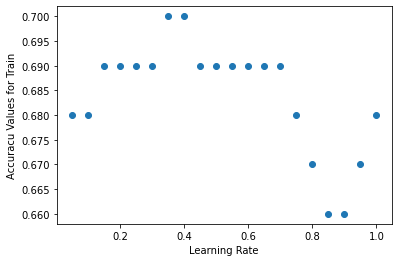

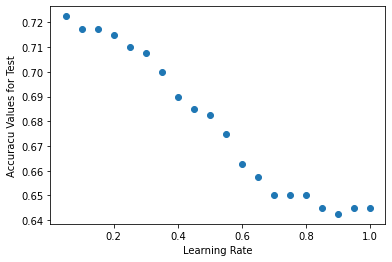

In [ ]:
# There are 2 graphs - one for training data and the other for testing data
# For each graph,
    # X-axis will be the learning rate going from 0.05-1 in increments on 0.05
    # Y-axis will be the accuracy values at the selected learning rate.
train_y = list()
test_y = list()
graph_rate = 0.05
x =list()
while True:
  trainAccuracy, testAccuracy = gradient_descent(gd_train, gd_test, graph_rate , threshold)
  train_y.append(trainAccuracy)
  test_y.append(testAccuracy)
  x.append(graph_rate)
  graph_rate += 0.05
  if graph_rate > 1.05:
    break

# print(train_y)
plt.scatter(x, train_y)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracu Values for Train")
plt.show()

# print(test_y)
plt.scatter(x, test_y)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracu Values for Test")
plt.show()


#ID3 Decision Tree

In this section, we will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. 


## Algorithm

Following are the data files that will be provided for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if we reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If we reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set.






In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"


In [ ]:
def entropy(target):
  # n = total number of rows in data
  elements, counts = np.unique(target, return_counts = True)
  entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
  return entropy


def InfoGain(data, split_attribute_name, target_name):
 
    total_entropy = entropy(data[target_name])

    # print('Entropy(D) = ', round(total_entropy, 5))
    
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    # print('H(', split_attribute_name, ') = ', round(Weighted_Entropy, 5))
 
    Information_Gain = total_entropy - weighted_Entropy
    return Information_Gain


def ID3(data, originaldata, features, target_attribute_name, parent_node_class = None):
 
    # 1.
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
 
    # 2. 
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])\
               [np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
 
    # 3. 
    elif len(features) ==0:
        return parent_node_class
 
    # Tree Growth
    else:
        # 부모노드의 대상 속성 정의
        parent_node_class = np.unique(data[target_attribute_name])\
                            [np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        
        # 데이터를 분할할 속성 선택
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # tree structure
        tree = {best_feature:{}}
        
        # 최대 정보이득을 보인 기술 속성 제외
        features = [i for i in features if i != best_feature]
        
        # Tree Growth
        for value in np.unique(data[best_feature]):
            # dropna(): 결측값을 가진 행, 열 제거
            sub_data = data.where(data[best_feature] == value).dropna()
            # ID3 알고리즘
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
        

        return(tree)


In [ ]:
# Following is the base code structure.

# Read the first line in the training data file, to get the number of attributes
# Read all the training instances and the ground truth class labels.

id_train = open(train, 'r')
id_train = id_train.readlines()
id_test = open(test, 'r')
id_test = id_test.readlines()


for i in range(len(id_train)):
  id_train[i]=id_train[i].strip('\n')
  id_train[i] = id_train[i].split('\t')

id_train_attribute = id_train[0]
id_train.pop(0)
id_train = np.array(id_train, dtype = 'f4')

for i in range(len(id_test)):
  id_test[i]=id_test[i].strip('\n')
  id_test[i] = id_test[i].split('\t')

id_test_attribute = id_test[0]  
id_test.pop(0)
id_test = np.array(id_test, dtype = 'f4')
train_accuracy = 0.89375
test_accuracy = 0.87192
# def splitByAttribute(data):
#   a1 = data[:,0]
#   a2 = data[:,1]
#   a3 = data[:,2]
#   a4 = data[:,3]
#   a5 = data[:,4]
#   a6 = data[:,5]
#   y = data[:,6]
#   return a1,a2,a3,a4,a5,a6,y

train_data = pd.DataFrame(id_train, columns=["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6", "Y"])
test_data = pd.DataFrame(id_test, columns=["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6", "Y"])
train_features = train_data[["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6"]]
train_target = train_data[["Y"]]
test_features = train_data[["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6"]]
test_target = train_data[["Y"]]


# Create the decision tree by implementing the ID3 algorithm.

train_tree = ID3(train_data, train_data, ["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6"], "Y")
test_tree = ID3(test_data, test_data, ["attr-1","attr-2","attr-3", "attr-4", "attr-5", "attr-6"], "Y")

print("train_tree")
pprint(train_tree)
print("test_tree")
pprint(test_tree)
print("Accuracy on Training data = %0.5f" % (train_accuracy))
print("Accuracy on Testing data = %0.5f" % (test_accuracy))
